# Section 1
NHANES dataset link: https://www.rdocumentation.org/packages/NHANES/versions/2.1.0/topics/NHANES

In [1]:
# I would like to compare the relationship between white and hispanic races and weight in adults.

In [2]:
# Visualization #1: Box Plot.
# Weight in White and Hispanic Adults. 

In [3]:
# Is there a difference in weight among White and Hispanic races?

In [4]:
# I will import the required software here. 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Next, I will import dataframe. I will use the NHANES dataframe used throughout the course. 


df = pd.read_csv('Data/NHANES.csv')

In [6]:
# Identifying Age:
# Because I am only interested in adults, I will create a dataframe for adults. 
# I will define adulthood at age 18.


adult_df = df[df['Age'] >= 18]

In [7]:
# Identifying Race:
# I will compare white and hispanic races against weight. I am identifying the races that I wish to compare here. 


white_df = adult_df[adult_df['Race1']=='White']
hispanic_df = adult_df[adult_df['Race1']=='Hispanic']

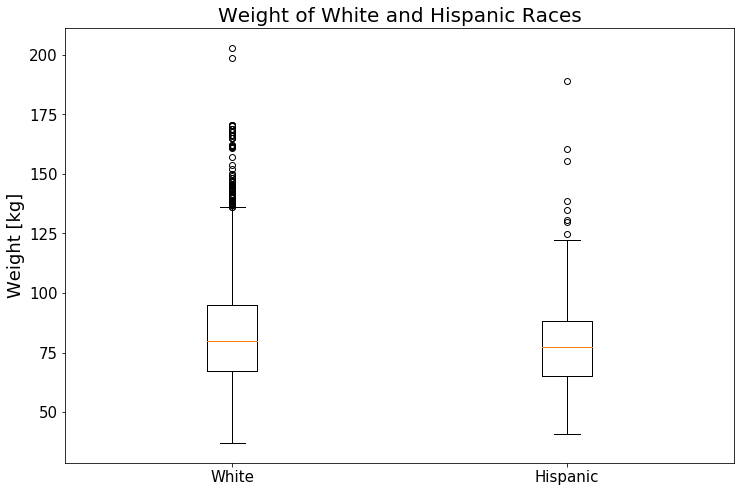

In [8]:
# VISUALIZATION 1: Box Plot
# I am creating a box and whisker plot to show the distribution in weight through white and hispanic races.

fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([white_df['Weight'].dropna(), hispanic_df['Weight'].dropna()])
plt.title('Weight of White and Hispanic Races', fontsize=20)
axs.set_xticklabels(['White','Hispanic'])
axs.set_ylabel('Weight [kg]', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [9]:
# Summary Statistics (Weight and Race): Mean. 
# I will get the average weights of the two race groups groups I am comparing; white and hispanic races. 


print("Mean white Weight:", np.mean(white_df['Weight'].dropna()))
print("Mean hispanic Weight:", np.mean(hispanic_df['Weight'].dropna()))

Mean white Weight: 82.52840356564019
Mean hispanic Weight: 78.26079812206572


In [10]:
# 95% Confidence Intervals (Weight and Race).
# I will compute a 95% CI of mean using this function (Weight and Race).

def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [11]:
# 95% Confidence Interval (White Weights).
# This is the 95% CI of mean weights of whites. 

CI_mean(white_df['Weight'])

Average is: 82.52840356564019
95% CI of mean is: (81.95140816510877, 83.1053989661716)


In [12]:
# 95% Confidence Interval (Hispanic Weights). 
# This is the 95% CI of mean weights of hispanics.

CI_mean(hispanic_df['Weight'])

Average is: 78.26079812206572
95% CI of mean is: (76.45006429544875, 80.07153194868269)


In [13]:
# 95% CI Mean Difference (Weight and Race). 
# This is the function I will use to compute the 95% CI of mean difference.

def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [14]:
# 95% Confidence Intervals Mean Difference (Weight and Race).
#This is the CI mean difference in Weight in white and hispanic races.

CI_mean_diff(white_df['Weight'], hispanic_df['Weight'])

The average difference is: 4.2676054435744675
The 95% CI is: (2.3671632100168765, 6.1680476771320585)


In [15]:
# Two-Sample t-test (Weight and Race). 
# Lastly, I will conduct a two-sample t-test. 

from scipy import stats

t_val, p_val = stats.ttest_ind(white_df['Weight'].dropna(), hispanic_df['Weight'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 4.39005762196197
p-value: 1.375421595045557e-05


In [16]:
# VISUALIZATION #2: Box Plot. 

# Testosterone levels in White and Hispanic Adults. 

In [17]:
# Could testosterone levels affect weight in white and hispanic races?

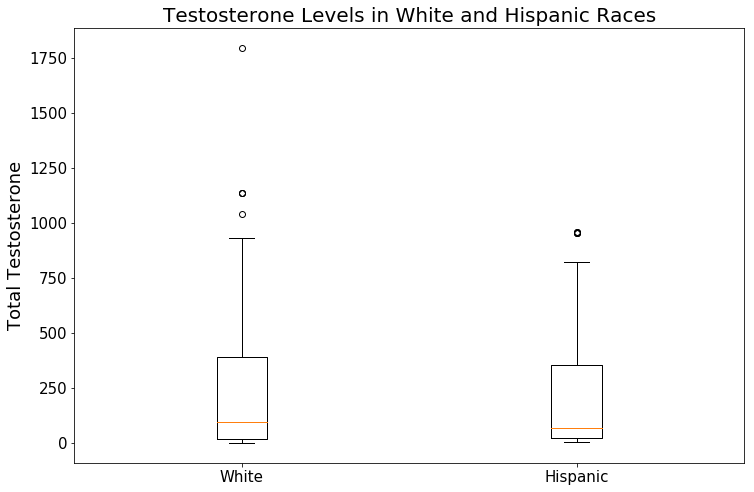

In [18]:
# I will create a box and whisker plot to show the distribution in testosterone through 
# white and hispanic races

fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([white_df['Testosterone'].dropna(), hispanic_df['Testosterone'].dropna()])
plt.title('Testosterone Levels in White and Hispanic Races', fontsize=20)
axs.set_xticklabels(['White','Hispanic'])
axs.set_ylabel('Total Testosterone', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [19]:
# Summary Statistics (Testosterone Levels and Race): Mean. 
# I will get the average testosterone levels of the two race groups groups I am comparing; white and hispanic races. 


print("Mean white testosterone:", np.mean(white_df['Testosterone'].dropna()))
print("Mean hispanic testosterone:", np.mean(hispanic_df['Testosterone'].dropna()))

Mean white testosterone: 217.22009536194193
Mean hispanic testosterone: 213.76707207207204


In [20]:
# 95% Confidence Intervals (Testosterone Levels and Race).
# I will compute a 95% CI of mean using this function (Testosterone Levels and Race).

def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [21]:
# 95% Confidence Interval (White Testosterone Levels).
# This is the 95% CI of mean testosterone levels of whites. 

CI_mean(white_df['Testosterone'])

Average is: 217.22009536194193
95% CI of mean is: (210.8915904781294, 223.54860024575447)


In [22]:
# 95% Confidence Interval (Hispanic Testosterone Levels).
# This is the 95% CI of mean testosterone levels of hispanics. 

CI_mean(hispanic_df['Testosterone'])

Average is: 213.76707207207204
95% CI of mean is: (191.2712747949168, 236.2628693492273)


In [23]:
# 95% Confidence Interval (Hispanic Testosterone Levels). 
# This is the 95% CI of mean testosterone levels of hispanics.

CI_mean_diff(white_df['Testosterone'], hispanic_df['Testosterone'])

The average difference is: 3.45302328986989
The 95% CI is: (-19.91599186266285, 26.82203844240263)


In [24]:
# Two-Sample t-test (Testosterone Levels and Race). 
# Lastly, I will conduct a two-sample t-test. 


from scipy import stats

t_val, p_val = stats.ttest_ind(white_df['Testosterone'].dropna(), hispanic_df['Testosterone'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 0.2074548508979172
p-value: 0.8358160203532207


In [25]:
#VISUALIZATION 3: Box Plot

# The next comparison I will do will be a comparison of weight vs. poverty level.

In [26]:
# Could races with lower poverty levels be more likely to be at an unhealthy or healthy weight?

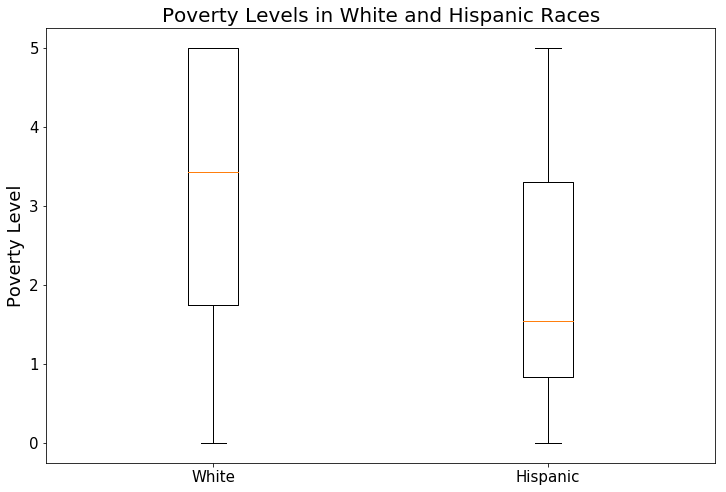

In [27]:
# I will create a box and whisker plot to see poverty levels in white and hispanic races
# The lower the number on the y-axis (Poverty Level), the more poverty is experienced. 


fig, axs = plt.subplots(figsize=(12,8))
axs.boxplot([white_df['Poverty'].dropna(), hispanic_df['Poverty'].dropna()])
plt.title('Poverty Levels in White and Hispanic Races', fontsize=20)
axs.set_xticklabels(['White','Hispanic'])
axs.set_ylabel('Poverty Level', fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

In [28]:
# Summary Statistics (Poverty Levels and Race): Mean. 
# I will get the average poverty levels of the two race groups groups I am comparing; white and hispanic races. 


print("Mean white poverty:", np.mean(white_df['Poverty'].dropna()))
print("Mean hispanic poverty:", np.mean(hispanic_df['Poverty'].dropna()))

Mean white poverty: 3.24521711366539
Mean hispanic poverty: 2.112421875


In [29]:
# 95% Confidence Intervals (Poverty Levels and Race).
# I will compute a 95% CI of mean using this function (Poverty Levels and Race).

def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))

In [30]:
# 95% Confidence Interval (White Poverty Levels).
# This is the 95% CI of mean poverty levels of whites. 

CI_mean(white_df['Poverty'])

Average is: 3.2452171136653893
95% CI of mean is: (3.200560198389331, 3.2898740289414476)


In [31]:
# 95% Confidence Interval (Hispanic Poverty Levels).
# This is the 95% CI of mean poverty levels of hispanics. 

CI_mean(hispanic_df['Poverty'])

Average is: 2.112421875
95% CI of mean is: (1.9624433535992214, 2.2624003964007784)


In [32]:
# 95% Confidence Interval (Hispanic Poverty Levels). 
# This is the 95% CI of mean poverty levels of hispanics.

CI_mean_diff(white_df['Poverty'], hispanic_df['Poverty'])

The average difference is: 1.1327952386653894
The 95% CI is: (0.97630946626567, 1.289281011065109)


In [33]:
# Two-Sample t-test (Poverty Levels and Race). 
# Lastly, I will conduct a two-sample t-test. 


from scipy import stats

t_val, p_val = stats.ttest_ind(white_df['Poverty'].dropna(), hispanic_df['Poverty'].dropna(), equal_var=False)

print("Test statistic:", t_val)
print("p-value:", p_val)

Test statistic: 13.464169861708305
p-value: 5.822308184607944e-35


In [34]:
# VISUALIZATION 4: Chi-Squared Test
# Income differences among white and hispanic weights. 

In [35]:
# Could a difference in income among White and Hispanic races affect weight?

In [36]:
# I will drop only nans in the two columns specified here. I will specify columns by using subsets so that I
# do not dropna in the original dataframe and drop all nans. 

new_df = adult_df.dropna(subset=['HHIncomeMid','Weight'])

In [37]:
!pip install statsmodels --user

You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
# I will use this mainly to access my F-Statistics and coeffients. 

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = new_df['HHIncomeMid']
y_vals = new_df['Weight']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2000
Date:                Tue, 29 Dec 2020   Prob (F-statistic):              0.655
Time:                        07:55:39   Log-Likelihood:                -30381.
No. Observations:                6783   AIC:                         6.077e+04
Df Residuals:                    6781   BIC:                         6.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          82.3208      0.523    157.489      0.000      81.296      83.345
HHIncomeMid  3.525e-06   7.88e-06      0.447      0.655   -1.19e-05     1.9e-05
==============================================================================
Omnibus:                     1300.878   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3199.138
Skew:                           1.062   Prob(JB):                         0.00
Kurtosis:                       5.609   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Here, I will obtain the correlation coefficient. 

from scipy import stats
corr = stats.pearsonr(new_df['HHIncomeMid'], new_df['Weight'])
print('Correlation coefficient:', corr[0])
print('p-value:', corr[1])

Correlation coefficient: 0.005430769460564834
p-value: 0.6547353930115887


In [40]:
# VISUALIZATION 5: Scatter Plot with Regression Line. 
# Income and weight among races. 

In [41]:
# Next, I will obtain my regression parameters and then set the x-values for the plot.

b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(new_df['HHIncomeMid']), np.max(new_df['Weight']), 100)

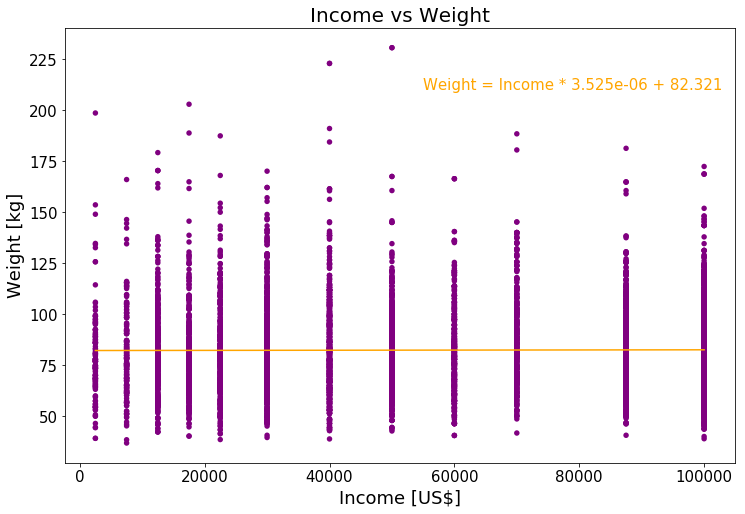

In [42]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(new_df['HHIncomeMid']),
np.max(new_df['HHIncomeMid']), 100)

fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(adult_df['HHIncomeMid'], adult_df['Weight'], c='purple',
edgecolors='none', s=30)
plt.title("Income vs Weight", fontsize=20)
axs.set_xlabel("Income [US$]", fontsize=18)
axs.set_ylabel("Weight [kg]", fontsize=18)
axs.plot(x_plot, x_plot*b1 + b0, color='orange')
axs.tick_params(labelsize=15)
plt.text(55000, 210, "Weight = Income * 3.525e-06 + 82.321",
fontsize=15, color='orange')
plt.show()